# Utils


In [ ]:

%load_ext Cython

In [ ]:
%%cython
import numpy as np
cimport cython
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def by_part_votes(int n, int part, np.ndarray[double, ndim=1] base_dist):
    cdef double acc = 0.0
    cdef np.ndarray[double, ndim=1] dist = base_dist.copy()
    for i in xrange(n/part):
        val = np.random.choice(2, part, p=dist)
        acc += np.sum(val)
        dist[1] = acc / ((i+1)*part) 
        dist[0] = 1 - dist[1]
    return acc

In [ ]:
# jupyter nbextension enable --py --sys-prefix widgetsnbextension
# pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
# pip install jupyter_nbextensions_configurator
# jupyter contrib nbextension install --user
# jupyter nbextensions_configurator enable --user
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

def set_size():
    fig_size = plt.rcParams["figure.figsize"]

    # Prints: [6.0, 4.0]
#     print "Current size:", fig_size

    # Set figure width to 12 and height to 9
#     fig_size[0] = 12
#     fig_size[1] = 8
    fig_size[0] = 9
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size
    
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

<center> <h1>Начало</h1> </center>
![hate_main](images/hate_main.png)

<center> <h1> Случайное событие</h1> 
![dice](images/dice.jpg)
![coin](images/coin.gif)
</center>

<center> <h1> Частотой появления события</h1> </center>

События:
- выпал орёл
- сумма значений игральных кубиокв равна 6

Формулая частоты появления события:
\begin{equation}
P(событие...)=\frac{кол. появлений}{кол. испытаний}
\end{equation}


Далее частоту называем вероятностью. Вероятность события А обозначается P(A). 

(mathematical danger)




## Несовместные события

Никакие из них не могут появиться одновременно.

Пусть события X и Y несовместны, тогда вероятность того что произойдёт одно из двух события (либо X либо Y):
\begin{equation}
P(X+Y)=P(X)+P(Y)
\end{equation}

## Независимые события

Это когда наступление одного из событий не изменяет вероятность наступления другого.

ПУсть события A и B независимы, тогда вероятность того что они произойдёт события A и событие B:
\begin{equation}
P(A,B)=P(A)P(B)
\end{equation}

<center> <h1>Опыты с монеткой</h1> </center>
 

CPU times: user 136 ms, sys: 92 ms, total: 228 ms
Wall time: 125 ms


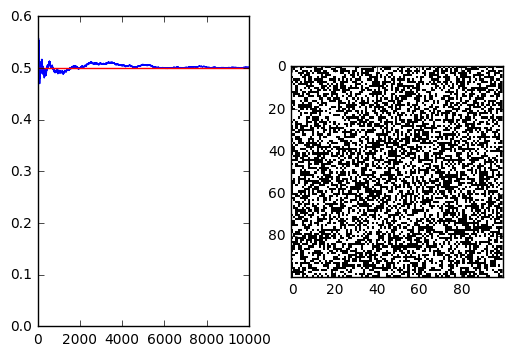

In [8]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math

c = 1
p = 0.5  
n = 100
data = np.random.binomial(c, p, n)

plt.subplot(121)
x_data = np.arange(n) + 1
y_data = np.cumsum(data).astype(float) / x_data
plt.plot(x_data,y_data)
plt.axhline(p, color='r')

plt.subplot(122)
w = int(math.sqrt(n))
plt.imshow( data[0:w*w].reshape(w,w), cmap=cm.gray,interpolation='none')

<center> <h1>"Парадоксы"</h1> </center>

<center> <h2>"Ошибка игрока",лакеры и невротики</h2> </center>

Кидаем монетку 10 раз. Бросили 9 и видим, что выпало 9 орлов! Что вероятнее выпадет при последнем десятом броске ?

![lucker](images/lucker.png)

Total:1000000
Found:2043
P=0.512971120901
CPU times: user 26.4 s, sys: 3.05 s, total: 29.4 s
Wall time: 25.8 s


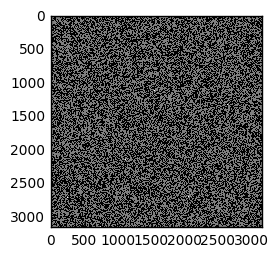

In [24]:
%%time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
  
n = 10
tests = 1000000
# tests = 10000
# tests = 100000
# tests = 1000000
found = 0
results = []
size = n*tests
data = np.zeros(size,dtype=int)
color = np.array([[0,0,0],[255,255,255],[255,0,0]])
for i in log_progress(xrange(tests),every=100):
    arr = np.random.binomial(1, 0.5, n)
    data[i*n:(i+1)*n] = arr
    if arr[0:n-1].sum() == n-1:
        data[(i+1)*n-1] = 2
        found += 1
        results.append(arr[n-1])
                
results = np.array(results)
print("Total:"+str(tests))
print("Found:"+str(found))
# print(results)
p = results.sum().astype(float) / found
print("P="+str(p))
# plt.subplot(121)

# x_data = np.arange(n) + 1
# y_data = np.cumsum(data).astype(float) / x_data
# plt.plot(x_data,y_data)
# plt.axhline(p, color='r')

plt.subplot(121)
w = int(math.sqrt(size))
plt.imshow( data[0:w*w].reshape(w,w), cmap=cm.gray,interpolation='none')
   
    

<center> <h1>"Парадокс Монти Холла"</h1> </center>
![montihol1](images/montihol1.jpg)


P(win changed his mind)=0.6719
P(win not changed his mind)=0.3281


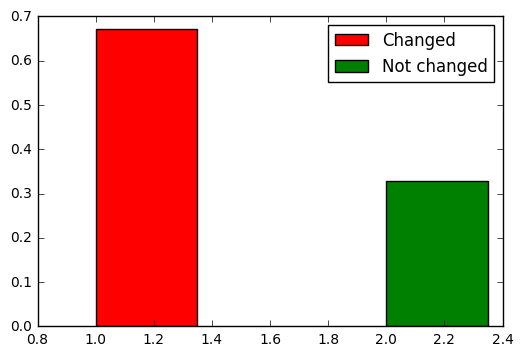

CPU times: user 472 ms, sys: 276 ms, total: 748 ms
Wall time: 440 ms


In [33]:
%%time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

tests = 10000
win_changed_his_mind = 0
win_not_changed_his_mind = 0
no_1 = [1,2]
no_2 = [0,2]
no_3 = [0,1]
no_arr = [no_1,no_2,no_3]
for i in log_progress(xrange(tests),every=100):
    door = np.random.randint(3)
    chooce = np.random.randint(3)
    if door == chooce:
        new_chooce = no_arr[chooce][np.random.randint(2)] 
    else:
        new_chooce = door
    
    if chooce == door:
        win_not_changed_his_mind += 1
        
    if new_chooce == door:
        win_changed_his_mind += 1
    
    
#     print("door",door)
#     print("chooce",chooce)
#     print("new_choce",new_choce)
p1 = float(win_changed_his_mind) / tests
p2 = float(win_not_changed_his_mind) / tests
print("P(win changed his mind)="+str(p1))
print("P(win not changed his mind)="+str(p2))
    
fig, ax = plt.subplots()
rects1 = ax.bar(1, (p1), 0.35, color='r')
rects2 = ax.bar(2, (p2), 0.35, color='g')
ax.legend((rects1[0], rects2[0]), ('Changed', 'Not changed'))
plt.show()

<center> <h1>Обьяснение "парадокаса"</h1> 
![montihol2](images/montihol2.png?2)
![montihol3](images/montihol3.png?2)
</center>

<center> <h1>Закрепление :)</h1> 
![extrasens](images/extrasens.jpeg)
</center>

<center> <h1>Нормальное распределение</h1> 
![normal1](images/normal1.jpg)
</center>


<center> <h1>Гаусиан</h1> 
![probability-distribution-standard-deviation](images/probability-distribution-standard-deviation.png)
<center>

sum:[1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1]=49


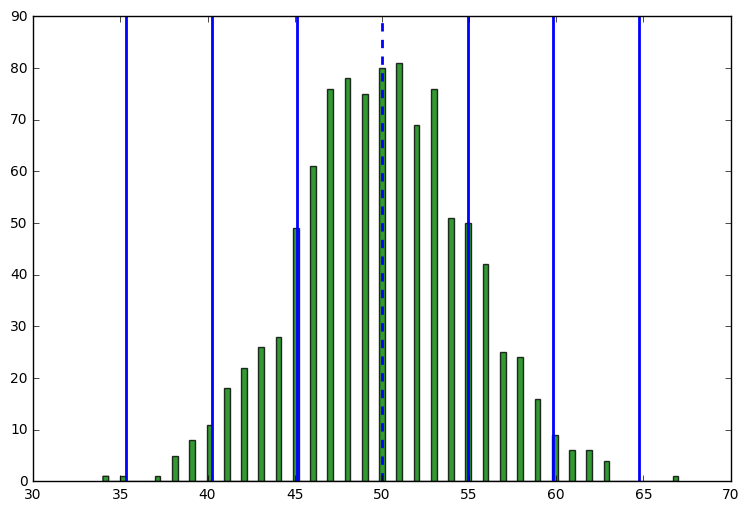

CPU times: user 608 ms, sys: 296 ms, total: 904 ms
Wall time: 561 ms


In [45]:
%%time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

c = 1 
p = 0.50  
n = 100
n_half = n / 2
tests = 1000
votes = np.zeros(tests)

for i in log_progress(xrange(tests),every=100):
    s = np.random.binomial(c, p, n)
    votes[i] = np.sum(s)
print("sum:"+str(s)+"="+str(np.sum(s)))
set_size()
# Hist
ax = plt.subplot(111)
ax.hist(votes,n,color='green',alpha=0.8)
sigma = np.std(votes)
mean = np.mean(votes)
ax.axvline(mean, color='b', linestyle='--', lw=2)
ax.axvline(mean+1*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean-1*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean+2*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean-2*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean+3*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean-3*sigma, color='b', linestyle='-', lw=2)

# Plot 
plt.show()

<center> <h1>Тест IQ</h1> 
![iq](images/iq.jpg?2)
<center>

<center> <h1>Демократия</h1> 
![democracy](images/democracy.jpg)
</center>


<center> <h1>Голосование</h1> </center>

In [67]:
p = 0.5 #
n = 10 #

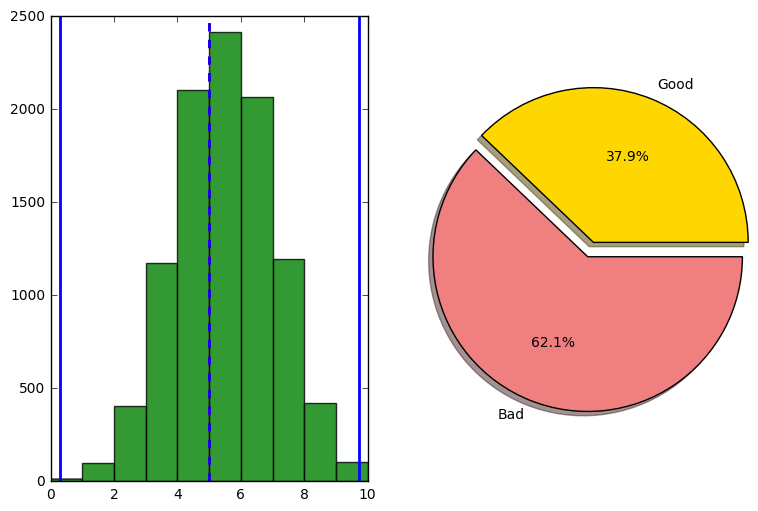

CPU times: user 708 ms, sys: 520 ms, total: 1.23 s
Wall time: 663 ms


In [68]:
%%time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

c = 1 
# p = 0.51  
# n = 1000
n_half = n / 2
tests = 10000
votes = np.zeros(tests)
results = np.zeros(tests)


for i in log_progress(xrange(tests),every=100):
    s = np.random.binomial(c, p, n)
    votes[i] = np.sum(s)
    results[i] = (votes[i] / n) > 0.5 
set_size()
# Hist
ax = plt.subplot(121)
ax.hist(votes,min(n,100),color='green',alpha=0.8)
sigma = np.std(votes)
mean = np.mean(votes)
ax.axvline(n/2, color='r', linestyle='--', lw=2)
ax.axvline(mean, color='b', linestyle='--', lw=2)
ax.axvline(mean+3*sigma, color='b', linestyle='-', lw=2)
ax.axvline(mean-3*sigma, color='b', linestyle='-', lw=2)
# Bar
labels = u'Good', u'Bad'
avproved = np.sum(results)
sizes = [avproved, tests - avproved]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  
ax2 = plt.subplot(122)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
# Plot 
plt.axis('equal')
plt.show()

<center> <h1>Голосуем группами</h1> </center>

In [70]:
p = 0.5
n = 10
part = 2

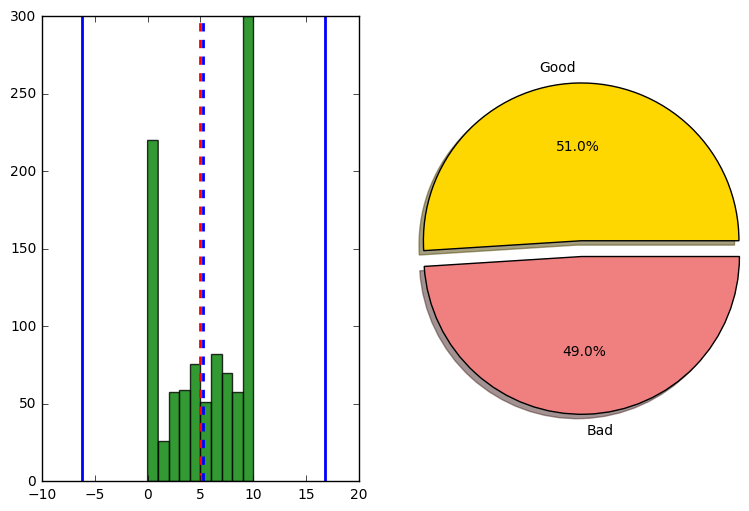

CPU times: user 724 ms, sys: 396 ms, total: 1.12 s
Wall time: 697 ms


In [71]:
%%time
%matplotlib inline

# n = 1000
# part = 500
base_dist = np.array([1-p,p])
acc = 0.0
n_half = n / 2
tests = 1000
    
votes = np.zeros(tests)
results = np.zeros(tests)

for j in log_progress(xrange(tests),every=10):
# for j in xrange(tests):
#     acc = 0.0
#     dist = base_dist.copy()
#     for i in xrange(n/part):
#         val = np.random.choice(2, part, p=dist)
#         acc += np.sum(val)
#         dist[1] = acc / ((i+1)*part) 
#         dist[0] = 1 - dist[1]
    acc = acc = by_part_votes(n,part,base_dist)
    votes[j] = acc
    results[j] = (acc / n) > 0.5 

set_size()
# Hist
plt.subplot(121)
# plt.yscale('log')
plt.hist(votes,min(n,100),color='green',alpha=0.8)
sigma = np.std(votes)
mean = np.mean(votes)
plt.axvline(n/2, color='r', linestyle='--', lw=2)
plt.axvline(mean, color='b', linestyle='--', lw=2)
plt.axvline(mean+3*sigma, color='b', linestyle='-', lw=2)
plt.axvline(mean-3*sigma, color='b', linestyle='-', lw=2)

# Bar
labels = u'Good', u'Bad'
avproved = np.sum(results)
sizes = [avproved, tests - avproved]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  

plt.subplot(122)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
# plt.yscale('logit')
# plt.title('logit')
# plt.grid(True)

# Plot 
plt.axis('equal')
plt.show()

<center> <h1>Нужно не так много, но многим :)</h1> 
![manga](images/manga.jpg)
</center>